In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gene_expression.csv')
df.head()

Gene One  Gene Two  Cancer Present
0       4.3       3.9               1
1       2.5       6.3               0
2       5.7       3.9               1
3       6.1       6.2               0
4       7.4       3.4               1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


## Exploratory Data Analysis

<Axes: xlabel='Gene One', ylabel='Gene Two'>

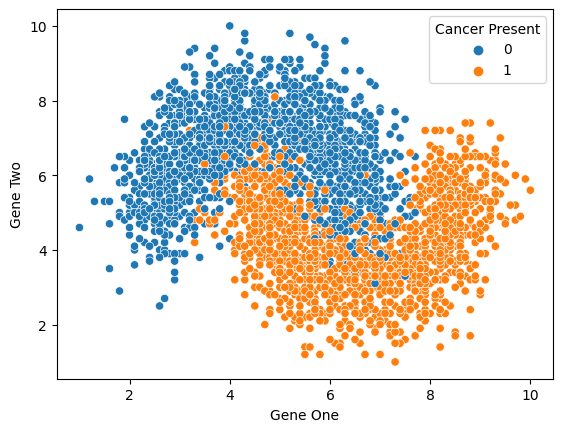

In [4]:
sns.scatterplot(x='Gene One', y='Gene Two', data=df, hue='Cancer Present')

In [5]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

Train = []
Test = []
CV = []

for i in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    model = LogisticRegression()
    model.fit(X_train, y_train)

    ypred_train = model.predict(X_train)
    ypred_test = model.predict(X_test)

    Train.append(model.score(X_train, y_train))
    # print('Train R2:', r2_score(y_train, ypred_train))
    Test.append(model.score(X_test, y_test))
    # print('Test R2:', r2_score(y_test, ypred_test))

    CV.append(cross_val_score(model, X_train, y_train, cv=5).mean())


em = pd.DataFrame({'Train':Train, 'Test':Test, 'CV':CV})
gm = em[(abs(em['Train']-em['Test']) <= 0.05) & (abs(em['Test']-em['CV']) <=0.05)]
print('best random state number:', gm[gm['Test']==gm['Test'].max()].index.to_list())

best random state number: [25]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Logistic Regression Model

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Modeling
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)


# prediction
ypred_train = model1.predict(X_train)
ypred_test = model1.predict(X_test)

# train accuracy
from sklearn.metrics import accuracy_score
print('Train Accuracy:', accuracy_score(y_train, ypred_train))

# CV Score
from sklearn.model_selection import cross_val_score
print('CV Score:', cross_val_score(model1, X_train, y_train, cv=5, scoring='accuracy').mean())

# test accuracy
print('Test Accuracy:', accuracy_score(y_test, ypred_test))

Train Accuracy: 0.8470833333333333
CV Score: 0.8466666666666667
Test Accuracy: 0.895


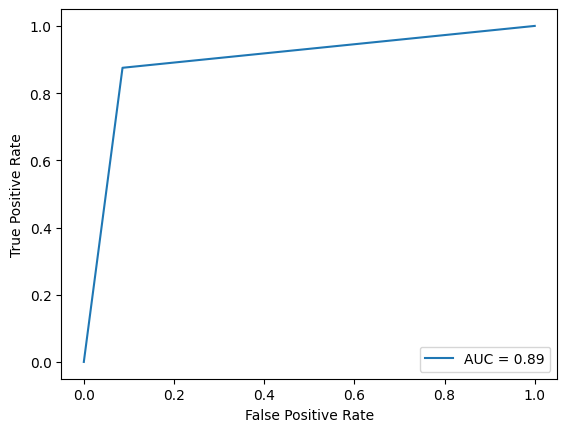

0.8948061472813947


In [10]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
fpr, tpr, thresolds = roc_curve(y_test, ypred_test)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()
print(roc_auc)

In [11]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, ypred_test)

0.8948061472813947

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred_test)
cm

array([[277,  26],
       [ 37, 260]], dtype=int64)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       303
           1       0.91      0.88      0.89       297

    accuracy                           0.90       600
   macro avg       0.90      0.89      0.89       600
weighted avg       0.90      0.90      0.89       600



# KNN Model

### this is the knn algorithm that's why we are reuqired to perform scaling

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Modelling with default parameters (KNN)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Prediction
y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_model, X, y, cv=5)
print(scores)
print(scores.mean())

0.9408333333333333
0.945
[0.91333333 0.93       0.92833333 0.93       0.93166667]
0.9266666666666665


### Choosing best K value
### Hyperparameter Tuning for KNN Classifier

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors' : list(range(1, 31)), 'p':[1, 2]}

full_cv_classifier = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
full_cv_classifier.fit(X_train, y_train)
full_cv_classifier.best_params_

{'n_neighbors': 20, 'p': 2}

### Rebuild KNN Model with best hyper parameters

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=20, p=2)
knn_model.fit(X_train, y_train)

# Prediction
y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_model, X, y, cv=5)
print(scores)
print(scores.mean())

0.9366666666666666
0.9483333333333334
[0.92666667 0.94666667 0.93166667 0.92833333 0.935     ]
0.9336666666666666


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[291,  12],
       [ 19, 278]], dtype=int64)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       303
           1       0.96      0.94      0.95       297

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



# SVM Model

In [20]:
# modelling
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Prediction
ypred_train = svm_model.predict(X_train)
ypred_test = svm_model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, ypred_train))
print(accuracy_score(y_test, ypred_test))

0.9329166666666666
0.9483333333333334


### Hyperparameter tuning

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
estimator = SVC()
param_grid = {'C' : [0.01, 0.1, 1, 10, 100], 'kernel':['rbf', 'linear',  'poly', 'signoid']}

full_cv_classifier = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
full_cv_classifier.fit(X_train, y_train)
full_cv_classifier.best_params_

{'C': 10, 'kernel': 'rbf'}

## Rebuild the SVM modelm with best parameters

In [22]:
# modelling
from sklearn.svm import SVC
svm_model2 = SVC(C=10, kernel='rbf')
svm_model2.fit(X_train, y_train)

# Prediction
ypred_train = svm_model2.predict(X_train)
ypred_test = svm_model2.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, ypred_train))
print(accuracy_score(y_test, ypred_test))

0.9320833333333334
0.9483333333333334


# DecisionTree Model
#### Decision tree classifier - with default hyperparameters

In [23]:
# Modelling
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train, y_train)

# Prediction
ypred_train = dt_default.predict(X_train)

# Evaluation
from sklearn.metrics import accuracy_score
print('Train accuracy:', accuracy_score(ypred_train, y_train))

from sklearn.model_selection import cross_val_score
print('Cross Validation:', cross_val_score(dt_default, X, y, cv=5).mean())

ypred_test = dt_default.predict(X_test)
print('Test accuracy:', accuracy_score(ypred_test, y_test))


Train accuracy: 0.9729166666666667
Cross Validation: 0.9036666666666667
Test accuracy: 0.9216666666666666


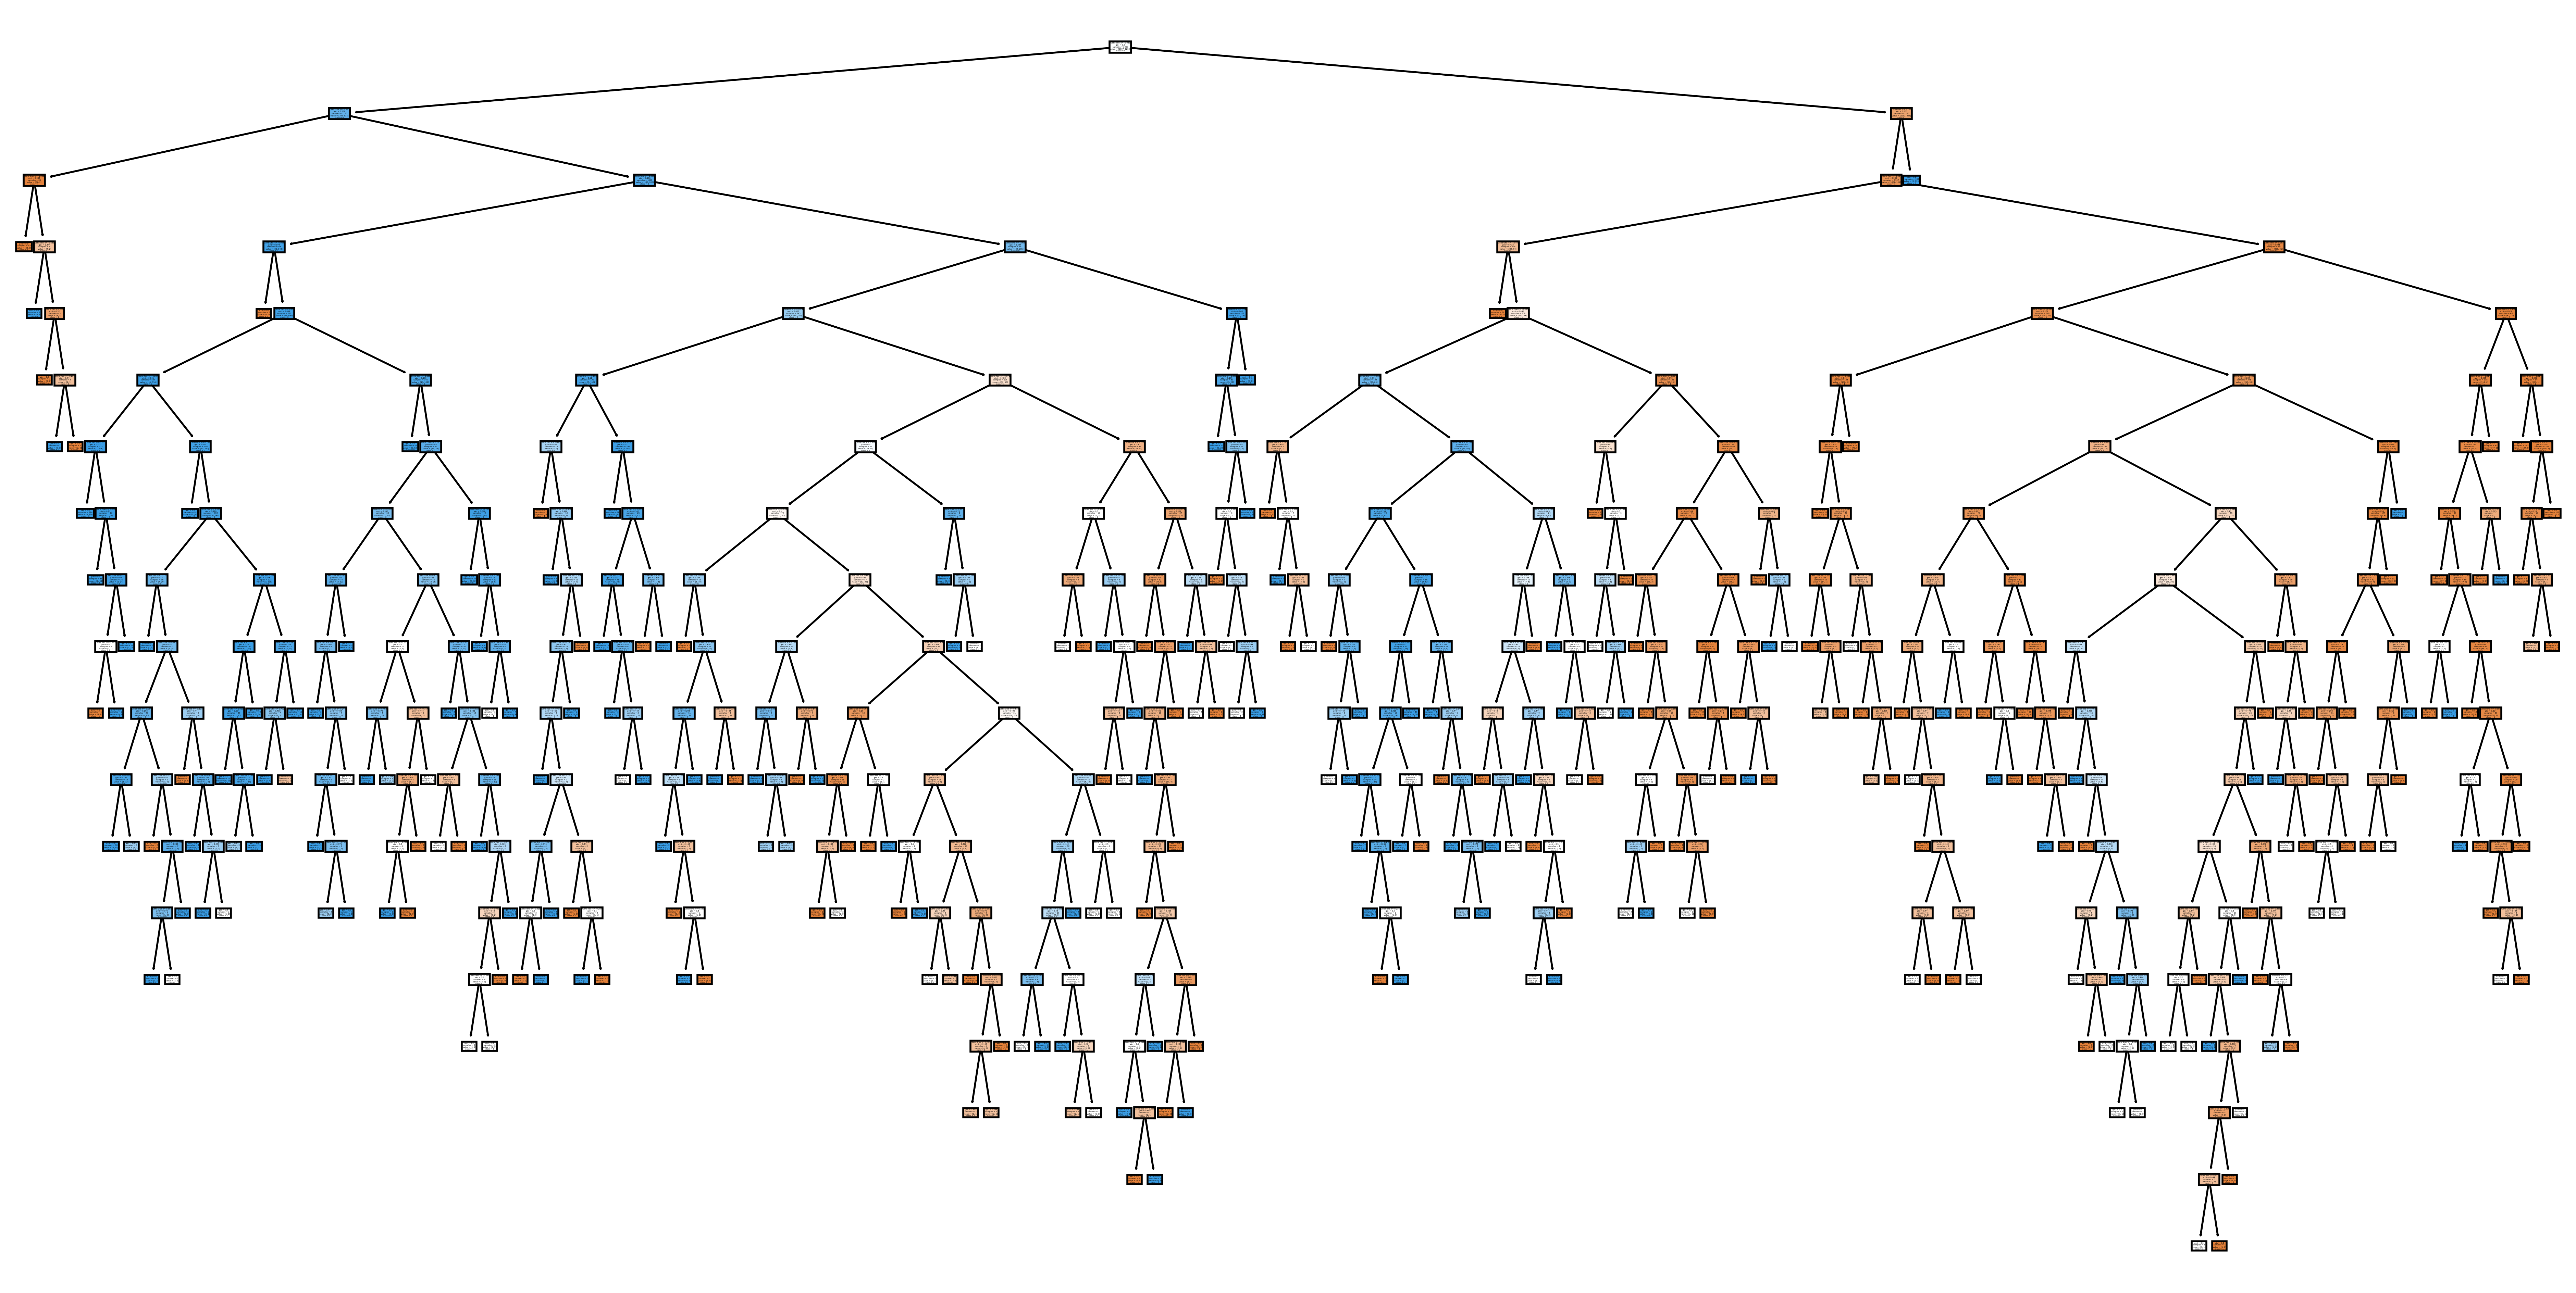

In [27]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24, 12), dpi=400)
plot_tree(dt_default, filled=True, feature_names=['Gene One', 'Gene Two', 'Cancer Present'], class_names=['1', '0'])
plt.show()

### Hyperparameter Tuning for Decision Tree Clssifier

In [28]:
from sklearn.model_selection import GridSearchCV

# model
estimator = DecisionTreeClassifier(random_state=0)

# parameters (which you want to tune and identify the best)
param_grid = {'criterion':['gini', 'entropy'],
             'max_depth':[1, 2, 3, 4, 5]}

grid = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [29]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=0)

#### Importance of each feature given by this model

In [30]:
data = grid.best_estimator_.feature_importances_
feats = pd.DataFrame(data, index=X.columns, columns=['Feature Importance'])
feats

Feature Importance
Gene One            0.465829
Gene Two            0.534171

In [31]:
feats_imp = feats[feats['Feature Importance']>0]
feats_imp

Feature Importance
Gene One            0.465829
Gene Two            0.534171

In [32]:
important_features_list = feats_imp.index.to_list()
important_features_list

['Gene One', 'Gene Two']

## Final DecisionTree Model
#### with best hyperparameter & with important features

In [33]:
# input with important features
X_imp = X[important_features_list]

# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=6)

# Model with best hyperparameters
final_dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
final_dt_model.fit(X_train, y_train)

ypred_train = final_dt_model.predict(X_train)
ypred_test = final_dt_model.predict(X_test)

# Evaluation
print('Train accuracy:', accuracy_score(ypred_train, y_train))
print('Test accuracy:', accuracy_score(ypred_test, y_test))
print('Cross Validation Score:', cross_val_score(final_dt_model, X_imp, y, cv=5).mean())

Train accuracy: 0.94125
Test accuracy: 0.92
Cross Validation Score: 0.9263333333333333


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred_test)

array([[286,  24],
       [ 24, 266]], dtype=int64)